### Model 1: size=300, window=5, min_count=2

In [53]:
?word2vec.PathLineSentences()

In [20]:
## use model = word2vec.Word2Vec.load("../models/wiki_news.model") to load the model if you need to re-train the model
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
sentences = word2vec.PathLineSentences('../segment')
# 设置模型参数，进行训练
import time
start_time = time.time()
model = word2vec.Word2Vec(sentences, size=300, window=5, min_count=2,workers=multiprocessing.cpu_count())
print(model.wv.similarity('研发', '研究'))
print(model.wv.similarity('爸爸', '妈妈'))
print(model.wv.similarity('研发', '发达'))
#save the model
model.save('../models/wiki_news.model')
print ("My program took", time.time() - start_time, "to run")

0.46607238
0.7714928
0.07077112
My program took 1586.9379830360413 to run


### Output word vectors to wiki_news_word_vector.txt for SIF embeddings

In [9]:
word_list=list(model.wv.vocab.keys())
word_vector_file= open("wiki_news_word_vector.txt","a")
for a, i in enumerate(word_list):
    #print (i + ' '+' '.join(map(str, model.wv[i[0]]))  )
    if a%100000==0:
        print (a)
    string=(i + ' '+' '.join(map(str, model.wv[i]))+'\n'  )
    word_vector_file.write(string)
word_vector_file.close()

### Model 1 Statistics

In [5]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("../models/wiki_news.model")

In [6]:
model.corpus_count

6676737

In [7]:
len(model.wv.vocab.items())

1439547

In [8]:
list(model.wv.vocab.keys())[:20]

['小米',
 'MIUI',
 '9',
 '首批',
 '机型',
 '曝光',
 '：',
 '共计',
 '15',
 '款',
 '此外',
 '，',
 '自',
 '本周',
 '（',
 '6',
 '月',
 '12',
 '日',
 '）']

### Test word vectors from model 1:

In [10]:
import warnings
warnings.filterwarnings('ignore')
model.wv.most_similar('妈妈')

[('爸爸', 0.7714928388595581),
 ('奶奶', 0.7095995545387268),
 ('外婆', 0.6762410998344421),
 ('女朋友', 0.6670173406600952),
 ('男朋友', 0.6608315110206604),
 ('阿姨', 0.6569209098815918),
 ('老婆', 0.6551576852798462),
 ('老爸', 0.6529766321182251),
 ('爸妈', 0.6499042510986328),
 ('姨妈', 0.6455265879631042)]

In [11]:
model.wv.most_similar('美女')

[('美人', 0.6009103059768677),
 ('美少年', 0.6008457541465759),
 ('美艳', 0.595767617225647),
 ('帅哥', 0.5919140577316284),
 ('美貌', 0.5739984512329102),
 ('美男子', 0.573839008808136),
 ('谐星', 0.5614113807678223),
 ('贵妇', 0.5612012147903442),
 ('千金小姐', 0.5525163412094116),
 ('女鬼', 0.5499413013458252)]

In [12]:
model.wv.most_similar('华为')

[('中兴通讯', 0.7180880904197693),
 ('三星电子', 0.6611620783805847),
 ('OPPO', 0.6423127055168152),
 ('中国联通', 0.6417484283447266),
 ('魅族', 0.6330646872520447),
 ('中国电信', 0.6325844526290894),
 ('华硕', 0.6323373317718506),
 ('华为公司', 0.6272257566452026),
 ('宏碁', 0.6134549975395203),
 ('摩托罗拉', 0.6034471988677979)]

In [14]:
model.wv.most_similar('management')

[('processing', 0.8172861337661743),
 ('control', 0.8158136606216431),
 ('Integrated', 0.8143075704574585),
 ('Management', 0.8119733333587646),
 ('Processing', 0.8069379329681396),
 ('systems', 0.8064823150634766),
 ('Operational', 0.8058236837387085),
 ('software', 0.8056922554969788),
 ('Process', 0.8031324744224548),
 ('Instruction', 0.8018696308135986)]

In [13]:
model.wv.most_similar('30091')

[('Volumn1', 0.8714377284049988),
 ('吴家镇', 0.8665515184402466),
 ('加尔梅克', 0.8641220927238464),
 ('87.52', 0.8640688061714172),
 ('Daling', 0.8630167841911316),
 ('韩秀妍', 0.8626471757888794),
 ('龚砚庆', 0.8612948656082153),
 ('普吕努瓦', 0.8612275123596191),
 ('目矮甲', 0.8612179756164551),
 ('天降奇缘', 0.8597155809402466)]

In [15]:
model.wv.most_similar('12')

[('11', 0.9885998368263245),
 ('9', 0.9861344695091248),
 ('8', 0.9852745532989502),
 ('7', 0.9838634729385376),
 ('6', 0.9750338792800903),
 ('10', 0.9728521108627319),
 ('5', 0.9683938026428223),
 ('4', 0.9557263851165771),
 ('3', 0.9396927356719971),
 ('22', 0.9151217937469482)]

In [16]:
model.wv.most_similar('MIUI')

[('watchOS', 0.6904703378677368),
 ('Nexus', 0.6731964349746704),
 ('BlackBerry', 0.6686512231826782),
 ('EMUI', 0.666523277759552),
 ('Symbian', 0.663722813129425),
 ('安卓', 0.6545510292053223),
 ('Note', 0.6446356773376465),
 ('Android', 0.6433008909225464),
 ('Nokia', 0.6340469121932983),
 ('IOS', 0.6333281397819519)]

In [17]:
model.wv.most_similar('小米')

[('红米', 0.6888630390167236),
 ('魅族', 0.6621477603912354),
 ('OPPO', 0.617629885673523),
 ('苹果', 0.6170429587364197),
 ('iPhone', 0.5967674255371094),
 ('一加', 0.5939584374427795),
 ('MIUI', 0.5848538875579834),
 ('黑莓', 0.5801552534103394),
 ('华硕', 0.5766901969909668),
 ('Note', 0.570895791053772)]

In [20]:
def analogy(x1, x2, y1):
    result = model.most_similar
    (positive=[y1,x2], negative=[x1])
    return result[0][0]
print (analogy('中国','汉语','美国'))

西语


In [21]:
print (analogy('美国','奥巴马', '中国'))

温家宝


In [22]:
print (analogy('美丽','丑陋', '善良'))

狡猾


In [24]:
print (analogy('数学','微积分', '物理'))

电磁学


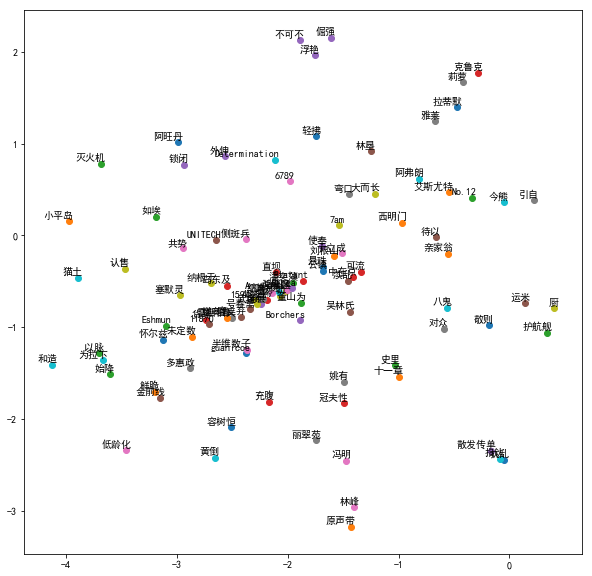

In [49]:
from sklearn.manifold import TSNE
import random
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model,n_words_to_plot):
    """
    Get n_words_to_plot random samples of words from the model and
    visulize result by t-sne
    https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
    """
    labels = []
    tokens = []
    
    words_to_plot=random.sample(list(model.wv.vocab),n_words_to_plot)

    for word in words_to_plot:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model,100)

### Model 2:  size=100, window=5, min_count=10

In [9]:
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing
# 如果目录中有多个文件，可以使用PathLineSentences
sentences = word2vec.PathLineSentences('../segment')
# 设置模型参数，进行训练
import time
start_time = time.time()
model2 = word2vec.Word2Vec(sentences, size=100, window=5, min_count=10,workers=multiprocessing.cpu_count())
print(model2.wv.similarity('研发', '研究'))
print(model2.wv.similarity('爸爸', '妈妈'))
print(model2.wv.similarity('研发', '发达'))
#save the model
model2.save('../models/wiki_news_model2.model')
print ("My program took", time.time() - start_time, "to run")

0.5295657
0.8939376
0.10712029
My program took 1172.2151808738708 to run


### Export the word vector from model 2 for SIF sentences embedding

In [32]:
word_list=list(model2.wv.vocab.keys())
word_vector_file= open("../models/wiki_news_model2_vector.txt","a")
for a, i in enumerate(word_list):
    #print (i + ' '+' '.join(map(str, model.wv[i[0]]))  )
    if a%100000==0:
        print (a)
    string=(i + ' '+' '.join(map(str, model2.wv[i]))+'\n'  )
    word_vector_file.write(string)
word_vector_file.close()

0
100000
200000
300000
400000


### Model 2 Statistics:

In [29]:
model2 = word2vec.Word2Vec.load("../models/wiki_news_model2.model")

In [30]:
model2.corpus_count

6676737

In [31]:
len(model2.wv.vocab.items())

447053

### Test word vectors from model 2:

In [32]:
model2.wv.most_similar('妈妈')

[('爸爸', 0.8939375281333923),
 ('爸妈', 0.8064553737640381),
 ('老公', 0.804161548614502),
 ('奶奶', 0.800416111946106),
 ('女孩', 0.7988275289535522),
 ('女朋友', 0.7986655235290527),
 ('老婆', 0.7909199595451355),
 ('小孩', 0.7895360589027405),
 ('小美', 0.7879323959350586),
 ('外婆', 0.782328724861145)]

In [33]:
model2.wv.most_similar('美女')

[('美人', 0.7188432216644287),
 ('帅哥', 0.6966958045959473),
 ('大叔', 0.6888607740402222),
 ('淑女', 0.685681939125061),
 ('美艳', 0.6797710657119751),
 ('美少年', 0.6678491234779358),
 ('少妇', 0.6646937727928162),
 ('绝色', 0.6636474132537842),
 ('妖艳', 0.6564374566078186),
 ('金发', 0.6481841802597046)]

In [34]:
model2.wv.most_similar('华为')

[('中兴通讯', 0.8015539646148682),
 ('谷歌', 0.7291452884674072),
 ('魅族', 0.7277430295944214),
 ('联想集团', 0.7193110585212708),
 ('华为公司', 0.717620849609375),
 ('奇虎', 0.7172646522521973),
 ('OPPO', 0.7148749828338623),
 ('华硕', 0.7064027786254883),
 ('三星电子', 0.7049561142921448),
 ('微软', 0.6993106603622437)]

In [35]:
model2.wv.most_similar('management')

[('Resource', 0.9037126898765564),
 ('services', 0.8867795467376709),
 ('Process', 0.8721637725830078),
 ('Processing', 0.8715369701385498),
 ('Instruction', 0.8686017394065857),
 ('service', 0.8676193952560425),
 ('software', 0.8676156997680664),
 ('technology', 0.8671813607215881),
 ('Integrated', 0.8658913969993591),
 ('processing', 0.8654922842979431)]

In [36]:
model2.wv.most_similar('12')

[('11', 0.9945169687271118),
 ('9', 0.9941761493682861),
 ('7', 0.9931890964508057),
 ('8', 0.9928522706031799),
 ('6', 0.9877157807350159),
 ('10', 0.9867614507675171),
 ('5', 0.9840888381004333),
 ('4', 0.9760638475418091),
 ('3', 0.9653990268707275),
 ('1', 0.9433048963546753)]

In [37]:
model2.wv.most_similar('MIUI')

[('IOS', 0.8223806619644165),
 ('Nexus', 0.8114953637123108),
 ('BlackBerry', 0.8086761236190796),
 ('CyanogenMod', 0.7756826877593994),
 ('Ryzen', 0.7740944623947144),
 ('Symbian', 0.7684909701347351),
 ('Oreo', 0.7678535580635071),
 ('watchOS', 0.765913188457489),
 ('安卓', 0.7616363763809204),
 ('Direct3D', 0.7598286867141724)]

In [38]:
model2.wv.most_similar('小米')

[('红米', 0.7814642786979675),
 ('魅族', 0.720660924911499),
 ('苹果', 0.714350700378418),
 ('一加', 0.6932433843612671),
 ('iPhone', 0.6911564469337463),
 ('MIUI', 0.6835007667541504),
 ('Mate', 0.6806187629699707),
 ('Nexus', 0.6622345447540283),
 ('Note', 0.6597521901130676),
 ('雷军', 0.6536288261413574)]

In [39]:
def analogy(x1, x2, y1):
    result = model2.most_similar
    (positive=[y1,x2], negative=[x1])
    return result[0][0]
print (analogy('中国','汉语','美国'))

法语


In [40]:
print (analogy('美国','奥巴马', '中国'))

江泽民


In [41]:
print (analogy('美丽','丑陋', '善良'))

狡猾


In [42]:
print (analogy('数学','微积分', '物理'))

统计力学


### random sample 50 words from model2 for visulization

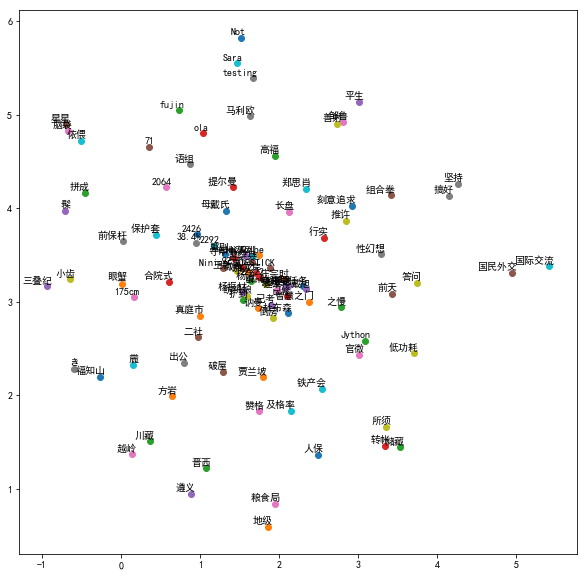

In [47]:
tsne_plot(model2,100)

### Model 3 :size=75, window=5, min_count=5

In [50]:
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing
# 如果目录中有多个文件，可以使用PathLineSentences
sentences = word2vec.PathLineSentences('../segment')
# 设置模型参数，进行训练
import time
start_time = time.time()
model3 = word2vec.Word2Vec(sentences, size=75, window=5, min_count=5,workers=multiprocessing.cpu_count())
print(model3.wv.similarity('研发', '研究'))
print(model3.wv.similarity('爸爸', '妈妈'))
print(model3.wv.similarity('研发', '发达'))
#save the model
model3.save('../models/wiki_news_model3.model')
print ("My program took", time.time() - start_time, "to run")

0.54009235
0.91908044
0.13948628
My program took 1293.7505719661713 to run


In [51]:
len(model3.wv.vocab.items())

700649

In [52]:
word_list=list(model3.wv.vocab.keys())
word_vector_file= open("../models/wiki_news_model3_vector.txt","a")
for a, i in enumerate(word_list):
    #print (i + ' '+' '.join(map(str, model.wv[i[0]]))  )
    if a%100000==0:
        print (a)
    string=(i + ' '+' '.join(map(str, model3.wv[i]))+'\n'  )
    word_vector_file.write(string)
word_vector_file.close()

0
100000
200000
300000
400000
500000
600000
700000


In [58]:
model2.wv.most_similar('小')

[('大', 0.7463065385818481),
 ('细小', 0.643763542175293),
 ('少', 0.6311187744140625),
 ('多', 0.6283155679702759),
 ('薄', 0.5852642059326172),
 ('高', 0.5806493759155273),
 ('短', 0.5760185718536377),
 ('窄小', 0.5702759623527527),
 ('暗', 0.5698781609535217),
 ('细', 0.5611412525177002)]

In [54]:
def analogy(x1, x2, y1):
    result = model3.most_similar(positive=[y1,x2], negative=[x1])
    return result[0][0]
print (analogy('中国','汉语','美国'))

法语


In [57]:
print (analogy('美国','奥巴马', '中国'))

江泽民


In [55]:
print (analogy('数学','微积分', '物理'))

统计力学


In [56]:
print (analogy('美丽','丑陋', '善良'))

懦弱


### Model can be updated by adding new sentences

In [ ]:
model = word2vec.Word2Vec.load("../models/word2vec.model")
new_sentences = [["6月12日", "6月13日"],["7月12日", "7月13日"]]
model.build_vocab(new_sentences, update=True)
model.train(new_sentences,total_examples=2,epochs=1)
#model.save('../models/word2Vec.model')